In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.graph_objects as go

In [18]:
customer_df = pd.read_csv("/content/Mall_Customers.csv")
df = customer_df
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
# shape of the dataset
print(customer_df.shape)

(200, 5)


In [20]:
def missing_value_describe(data):
    # check missing values in the data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No missing data!!!")
missing_value_describe(customer_df)

Number of columns with missing values: 0
No missing data!!!


In [21]:
px.histogram(customer_df, y="Spending Score (1-100)", 
             marginal="rug", title="Spending score distribution")

In [22]:
customer_df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [23]:
px.box(customer_df, x="Spending Score (1-100)", y="Gender",
          color="Gender", points='all',
          title="Distribution of spending score by gender")

In [24]:
# male customer spending score statistic summary
customer_df.query("Gender == 'Male'")["Spending Score (1-100)"].describe()

count    88.000000
mean     48.511364
std      27.896770
min       1.000000
25%      24.500000
50%      50.000000
75%      70.000000
max      97.000000
Name: Spending Score (1-100), dtype: float64

In [25]:
# female customer spending score statistic summary
customer_df.query("Gender == 'Female'")["Spending Score (1-100)"].describe()

count    112.000000
mean      51.526786
std       24.114950
min        5.000000
25%       35.000000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [26]:
px.histogram(customer_df, x="Age", title="Customer age distribution", nbins=10)

In [27]:
customer_df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [28]:
def bin_age(age):
    if age < 20: return "10-19"
    elif age < 30: return "20-29"
    elif age < 40: return "30-39"
    elif age < 50: return "40-49"
    elif age < 60: return "50-49"
    elif age < 70: return "60-69"
    else: return "70-79"

customer_df["age_group"] = customer_df.Age.apply(bin_age)

In [29]:
customer_df["age_group"].unique()

array(['10-19', '20-29', '30-39', '60-69', '50-49', '40-49', '70-79'],
      dtype=object)

In [30]:
age_group_order = ['10-19', '20-29', '30-39', '40-49', '50-49', '60-69', '70-79']
px.box(customer_df, y="Spending Score (1-100)", x="age_group",
       title="Distribution of spending score by age group and gender group",
       color="Gender",
       category_orders={"age_group": age_group_order},
       facet_row="Gender")

In [31]:
age_group_order = ['10-19', '20-29', '30-39', '40-49', '50-49', '60-69', '70-79']
px.box(customer_df, y="Annual Income (k$)", x="age_group",
       title="Distribution of annual income by age group and gender group",
       color="Gender",
       category_orders={"age_group": age_group_order},
       facet_row="Gender")

In [32]:
customer_df.drop(["CustomerID"], axis=1).corr()

<ipython-input-32-bde50fe15362>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [33]:
px.scatter(customer_df, 
       x="Annual Income (k$)", y="Spending Score (1-100)", 
       color="Gender",
       hover_name="Spending Score (1-100)",
       title="Non-linear relationship between the annual income and spending score")

In [34]:
px.scatter(customer_df, 
       x="Age", y="Spending Score (1-100)", 
       color="Gender",
       hover_name="Spending Score (1-100)",
       title="Non-linear relationship between the age and spending score")

In [35]:
pip install gap-stat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import numpy as np
import pandas as pd

# <>===============================================================<>  
from scipy import stats
import statistics

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from gap_statistic import OptimalK
# <>===============================================================<>  

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

plt.rcParams["figure.figsize"] = [16, 8]

width = 900
height = 600

bg_color = '#FFFFFF'
paper_bg = '#FFFFFF'

plt.rcParams.update({'font.size': 18})
color_charts = '#2baae2'
plt.style.use('ggplot')
color = '#16171f'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color
plt.rcParams['xtick.color'] = color
plt.rcParams['ytick.color'] = color

plt.rcParams.update({'text.color' : color,
                             'axes.labelcolor' : color})

plt.rcParams.update({'font.size': 17})
plt.rc('font', size=17)


#Default theme
sns.set_theme(palette='tab10',
              rc=None)


%matplotlib inline

# <>===============================================================<>  

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [37]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_group
0,1,Male,19,15,39,10-19
1,2,Male,21,15,81,20-29
2,3,Female,20,16,6,20-29
3,4,Female,23,16,77,20-29
4,5,Female,31,17,40,30-39


In [38]:
X = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values

# Cast the data to float if necessary
X = X.astype(float)

# Determine optimal number of clusters using gap statistic
n_clusters = OptimalK(n_jobs=-1)
n_clusters(X, cluster_array=np.arange(1, 7))

# Get the optimal number of clusters
n_clusters_g = n_clusters.n_clusters

print(f'Optimal number of clusters based on gap statistic: {n_clusters_g}')

Optimal number of clusters based on gap statistic: 4


In [39]:
# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# create a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# fit the data
dbscan.fit(X_scaled)

# get the labels and number of clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# print the results
print('Number of clusters:', n_clusters)

Number of clusters: 6


In [40]:
# Define the parameter grid
param_grid = {
    'n_clusters': range(2, n_clusters_g + 1),
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['auto', 'full', 'elkan'],
    'random_state': [0, 42, 100]
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4, 'n_init': 15, 'random_state': 42, 'tol': 0.0001}
Optimal number of clusters based on parameter grid: 4


For n_clusters = 2, the average silhouette score is : 0.29
For n_clusters = 3, the average silhouette score is : 0.38
For n_clusters = 4, the average silhouette score is : 0.41
For n_clusters = 5, the average silhouette score is : 0.44
For n_clusters = 6, the average silhouette score is : 0.45
For n_clusters = 7, the average silhouette score is : 0.44
For n_clusters = 8, the average silhouette score is : 0.43
For n_clusters = 9, the average silhouette score is : 0.41
For n_clusters = 10, the average silhouette score is : 0.38


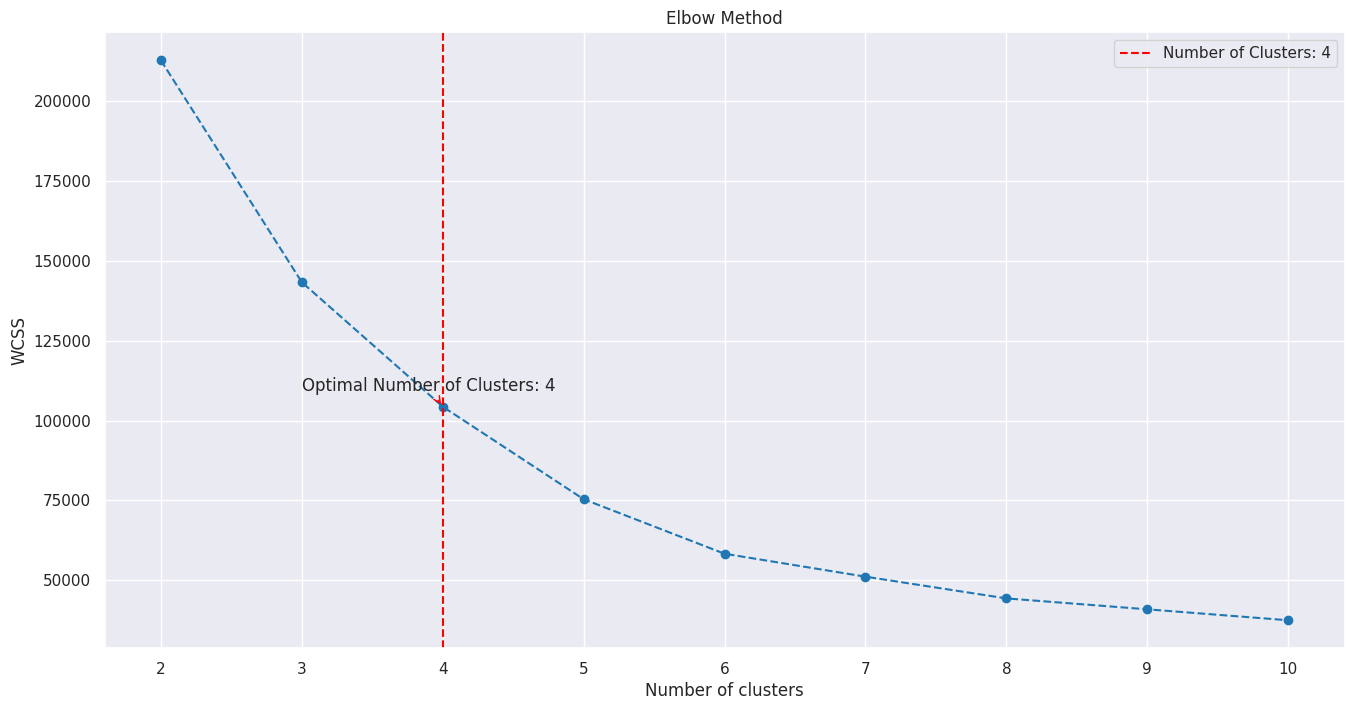

In [41]:
# Use the elbow method to find the optimal number of clusters
wcss = []
range_n_clusters = range(2, 11)
for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i, 
                init=grid_search.best_params_['init'], 
                max_iter=grid_search.best_params_['max_iter'], 
                tol=grid_search.best_params_['tol'], 
                algorithm=grid_search.best_params_['algorithm'], 
                random_state=42
                )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print(f'For n_clusters = {i}, the average silhouette score is : {round(silhouette_avg, 2)}')
    
plt.plot(range(2, 11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Add a vertical line indicating the number of clusters
n_clusters_g = grid_search.best_params_['n_clusters']
plt.axvline(x=n_clusters_g, linestyle='--', color='red', label=f'Number of Clusters: {n_clusters_g}')
plt.annotate(f'Optimal Number of Clusters: {n_clusters_g}', xy=(n_clusters_g, wcss[n_clusters_g-2]), xytext=(n_clusters_g-1, wcss[n_clusters_g-2]+5000),
            arrowprops=dict(arrowstyle='->',lw=1, color='red'), fontsize=12)
plt.legend()
plt.show()

In [42]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = n_clusters_g, 
                init=grid_search.best_params_['init'], 
                max_iter=grid_search.best_params_['max_iter'], 
                tol=grid_search.best_params_['tol'], 
                algorithm=grid_search.best_params_['algorithm'], 
                random_state=42
                )

In [43]:
# We divide our data into the four clusters.
kmeans.fit(X)

KMeans(algorithm='auto', max_iter=100, n_clusters=4, random_state=42)

In [44]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [45]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Age,Annual Income (k$),Spending Score (1-100)
Segment K-means,,,
0,40.394737,87.000000,18.631579
1,44.894737,48.705263,42.631579
2,24.821429,28.714286,74.250000
3,32.692308,86.538462,82.128205


In [46]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans.groupby(['Segment K-means']).size()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis[['Age', 'Annual Income (k$)']]

,Age,Annual Income (k$)
Segment K-means,,
0,40.394737,87.000000
1,44.894737,48.705263
2,24.821429,28.714286
3,32.692308,86.538462


In [47]:
df_segm_analysis.rename({0:'Young Moderate Income',
                         1:'Young Low Income',
                         2:'Middle-aged Low Income',
                         3:'Middle-aged High Income',
                         4:'Senior Moderate Income',
                         5:'Middle-aged High Income'
                        })

,Age,Annual Income (k$),Spending Score (1-100),N Obs,Prop Obs
Segment K-means,,,,,
Young Moderate Income,40.394737,87.000000,18.631579,38,0.190
Young Low Income,44.894737,48.705263,42.631579,95,0.475
Middle-aged Low Income,24.821429,28.714286,74.250000,28,0.140
Middle-aged High Income,32.692308,86.538462,82.128205,39,0.195


In [48]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'Young Moderate Income',
                         1:'Young Low Income',
                         2:'Middle-aged Low Income',
                         3:'Middle-aged High Income',
                         4:'Senior Moderate Income',
                         5:'Middle-aged High Income'
                        })

In [49]:
fig = px.scatter_3d(df_segm_kmeans, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Labels',
              symbol='Labels', opacity=0.7, size_max=10)

fig.update_layout(
    title={
        'text': "Segmentation Chart - Diego Hurtado",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Annual Income (k$)'),
        zaxis=dict(title='Spending Score (1-100)')),
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))


fig.show()